In [ ]:
!pip install pandas seaborn matplotlib

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linkedin-jobs-usa.csv to linkedin-jobs-usa.csv


In [ ]:
df = pd.read_csv('linkedin-jobs-usa.csv')
df.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


In [ ]:
# Keep only necessary columns
df = df[['title', 'description', 'location']]

# Basic Skill List for Extraction (you can add more if needed)
skill_keywords = ['Python', 'SQL', 'Excel', 'Tableau', 'Power BI', 'R', 'Machine Learning',
                  'Data Analysis', 'Communication', 'Statistics', 'AWS', 'Spark', 'ETL']


In [ ]:
# Function to extract skills from job description
def extract_skills(desc):
    desc = str(desc).lower()
    return [skill for skill in skill_keywords if skill.lower() in desc]


In [ ]:
# Extract skills from each job description
df['skills'] = df['description'].apply(extract_skills)

# Extract city name from location
df['city'] = df['location'].str.split(',').str[0]


In [ ]:
# Explode the list of skills so each skill gets its own row
exploded = df.explode('skills')

In [ ]:
# Count occurrences of each skill per city
skill_city_counts = exploded.groupby(['city', 'skills']).size().reset_index(name='count')

# Sort and keep top 10 skills per city
skill_city_counts = skill_city_counts.sort_values(['city', 'count'], ascending=[True, False])
top_skills_by_city = skill_city_counts.groupby('city').head(10)


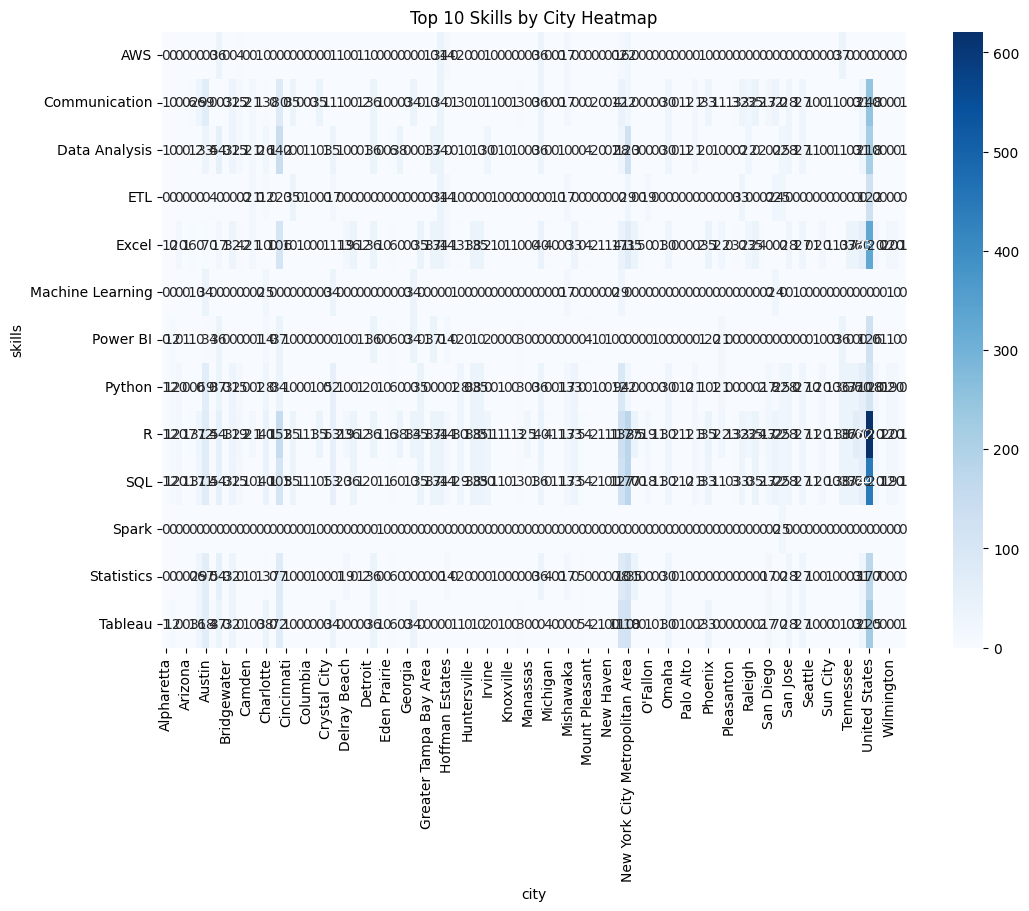

In [ ]:
# Prepare pivot table for heatmap
top_pivot = top_skills_by_city.pivot_table(index='skills', columns='city', values='count', fill_value=0)

# Round values for cleaner display
top_pivot = top_pivot.round(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Top 10 Skills by City Heatmap')
plt.show()


In [ ]:
# Count occurrences of each skill per job title
role_skill_counts = exploded.groupby(['title', 'skills']).size().reset_index(name='count')

In [ ]:
# Pivot table: Skills as rows, Job Titles as columns
role_skill_pivot = role_skill_counts.pivot_table(index='skills', columns='title', values='count', fill_value=0)

In [ ]:
# Round values for better display
role_skill_pivot = role_skill_pivot.round(0)

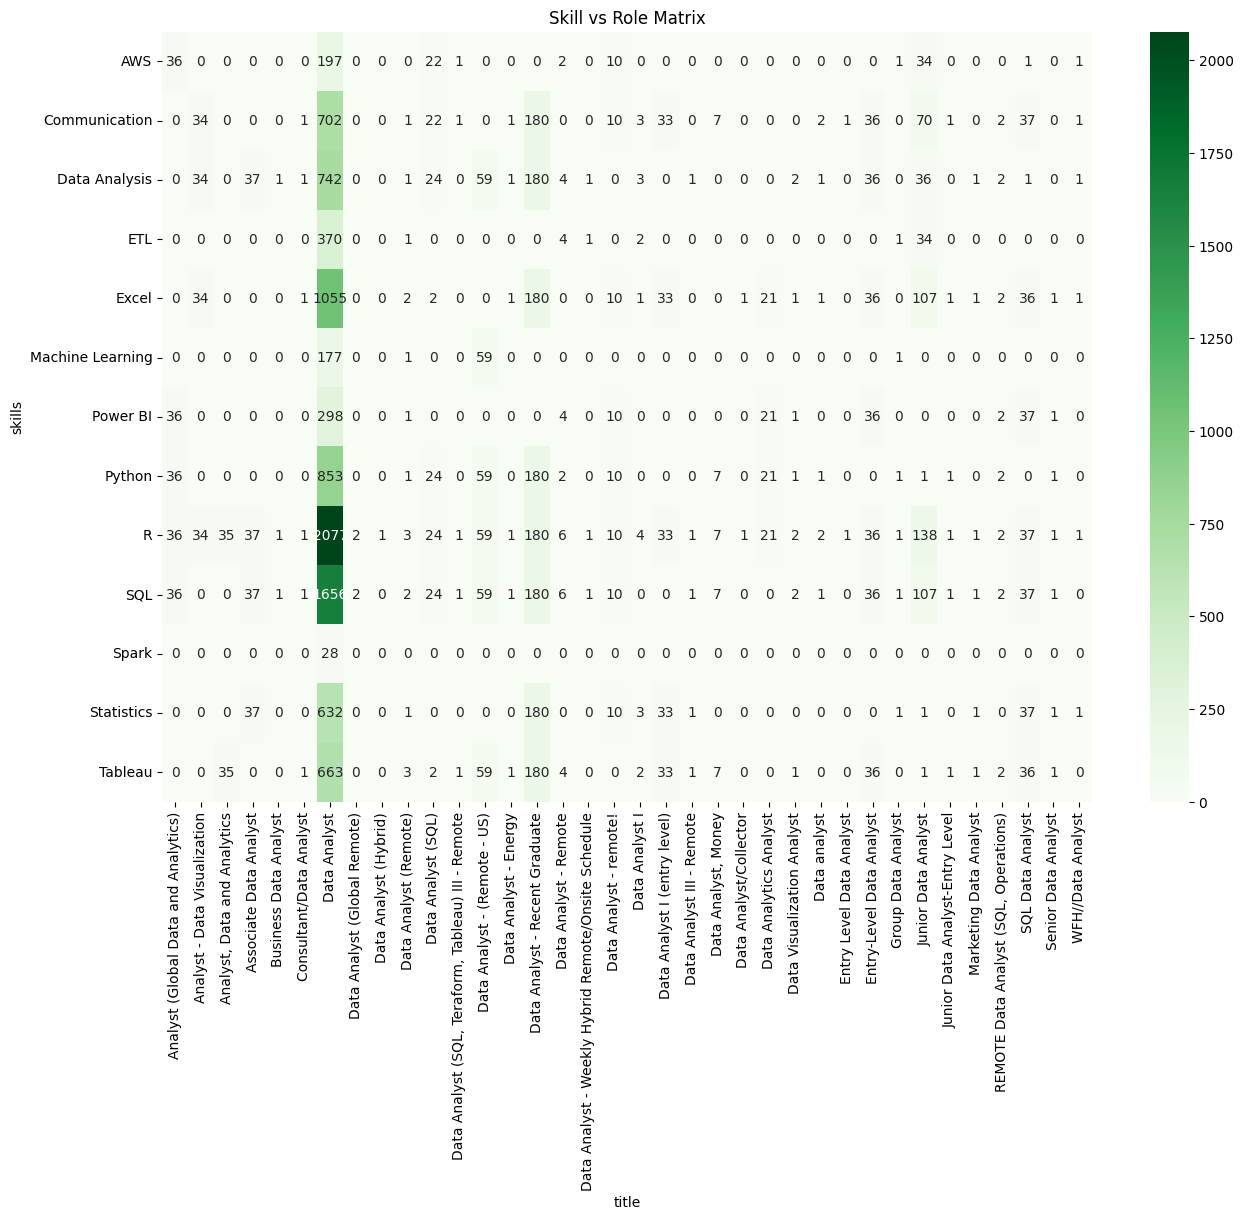

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(role_skill_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.title('Skill vs Role Matrix')
plt.show()

In [ ]:
# Count occurrences of each skill overall
top_skills = exploded['skills'].value_counts().head(10)

In [ ]:
print("\n=========== TOP 10 In-Demand Skills Across All Roles & Cities ===========\n")
for i, (skill, count) in enumerate(top_skills.items(), start=1):
    print(f"{i}. {skill}: {count} occurrences")
print("\n==========================================================================")


=========== TOP 10 In-Demand Skills Across All Roles & Cities ===========

1. R: 2799 occurrences
2. SQL: 2214 occurrences
3. Excel: 1528 occurrences
4. Python: 1201 occurrences
5. Data Analysis: 1169 occurrences
6. Communication: 1145 occurrences
7. Tableau: 1071 occurrences
8. Statistics: 939 occurrences
9. Power BI: 447 occurrences
10. ETL: 413 occurrences



In [ ]:
top_skills_by_city.to_csv('top_skills_by_city.csv', index=False)

In [ ]:
role_skill_pivot.to_csv('skill_vs_role_matrix.csv')

In [ ]:
from google.colab import files

# Download both CSVs
files.download('top_skills_by_city.csv')
files.download('skill_vs_role_matrix.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv('top_skills_by_city.csv').head(10)

,city,skills,count
0,Alpharetta,Communication,1
1,Alpharetta,Data Analysis,1
2,Alpharetta,Excel,1
3,Alpharetta,Python,1
4,Alpharetta,R,1
5,Alpharetta,SQL,1
6,Alpharetta,Tableau,1
7,Ann Arbor,Power BI,12
8,Ann Arbor,Python,12
9,Ann Arbor,R,12
